In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
data = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")
print(data.shape)

(303, 14)


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - have disease or not (1=yes, 0=no)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

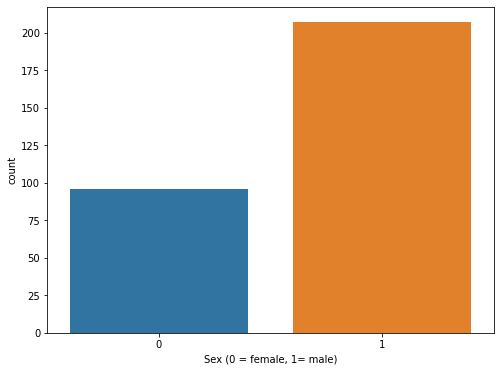

In [6]:
plt.figure(figsize = (8,6))
sns.countplot(data=data, x = 'sex')
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [7]:
data[data['sex'] == 1]['target'].value_counts()

0    114
1     93
Name: target, dtype: int64

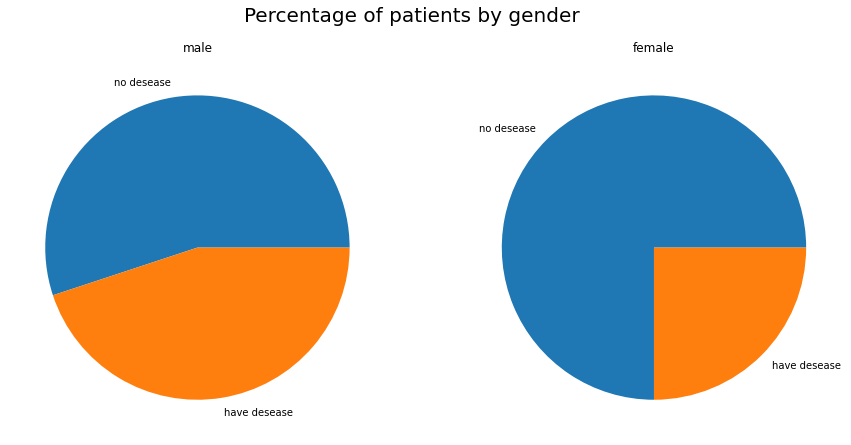

In [8]:
fig, ax = plt.subplots(1, 2, figsize= (15,7))

fig.suptitle('Percentage of patients by gender', fontsize = 20)
ax[0].pie(data[data['sex'] == 1]['target'].value_counts(), labels = ['no desease', 'have desease'])
ax[0].set_title('male')

ax[1].pie(data[data['sex'] == 0]['target'].value_counts(), labels = ['no desease', 'have desease'])
ax[1].set_title('female')
plt.show()

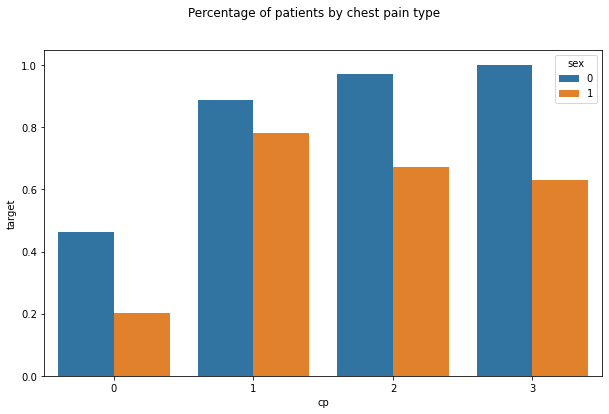

In [9]:
fig = plt.figure(figsize = (10, 6))
fig.suptitle("Percentage of patients by chest pain type")
sns.barplot(x="cp", y="target", hue = 'sex',
            data=data[['cp', 'target', 'sex']].groupby(['cp', 'sex'], as_index = False).mean()
)
plt.show()

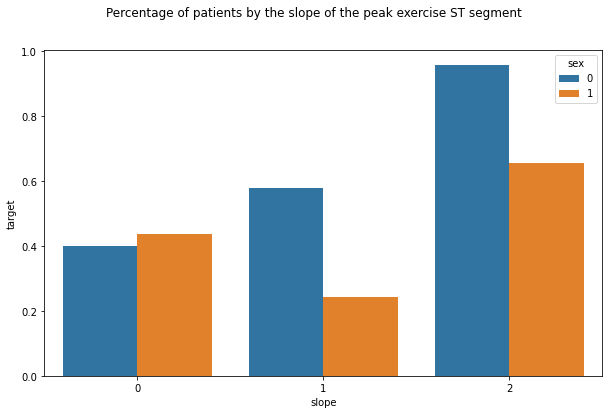

In [10]:
fig = plt.figure(figsize = (10, 6))
fig.suptitle("Percentage of patients by the slope of the peak exercise ST segment")
sns.barplot(x="slope", y="target", hue = 'sex',
            data=data[['slope', 'target', 'sex']].groupby(['slope', 'sex'], as_index = False).mean()
)
plt.show()

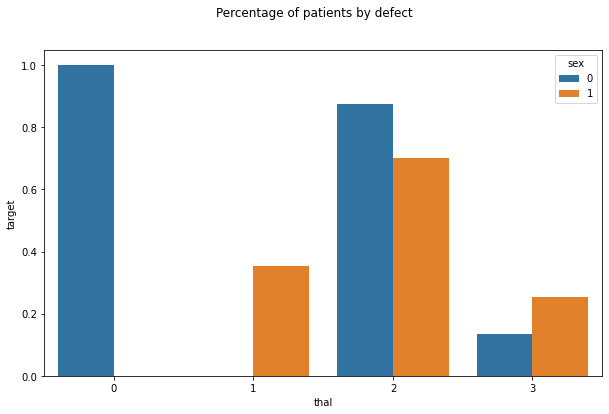

In [11]:
fig = plt.figure(figsize = (10, 6))
fig.suptitle("Percentage of patients by defect")
sns.barplot(x="thal", y="target", hue = 'sex',
            data=data[['thal', 'target', 'sex']].groupby(['thal', 'sex'], as_index = False).mean()
)
plt.show()

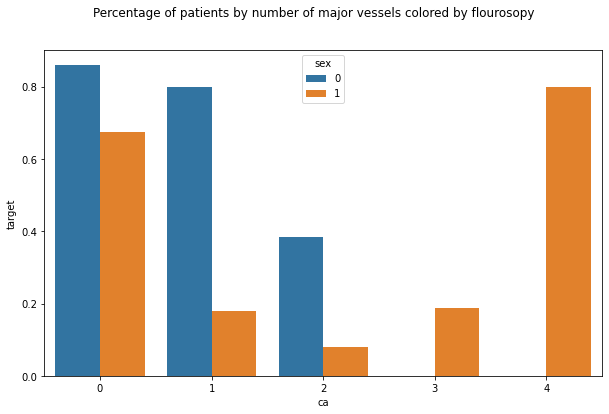

In [12]:
fig = plt.figure(figsize = (10, 6))
fig.suptitle("Percentage of patients by number of major vessels colored by flourosopy")
sns.barplot(x="ca", y="target", hue = 'sex',
            data=data[['ca', 'target', 'sex']].groupby(['ca', 'sex'], as_index = False).mean()
)
plt.show()

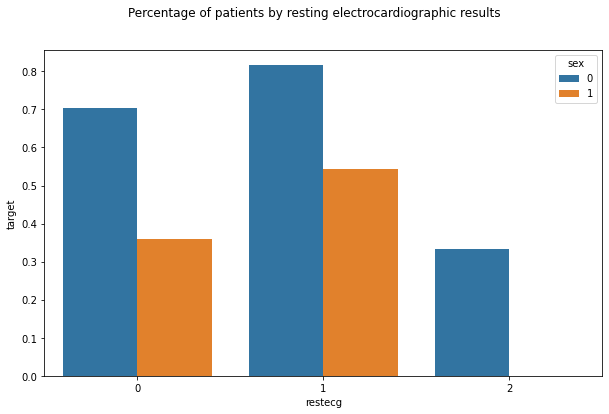

In [13]:
fig = plt.figure(figsize = (10, 6))
fig.suptitle("Percentage of patients by resting electrocardiographic results")
sns.barplot(x="restecg", y="target", hue = 'sex',
            data=data[['restecg', 'target', 'sex']].groupby(['restecg', 'sex'], as_index = False).mean()
)
plt.show()

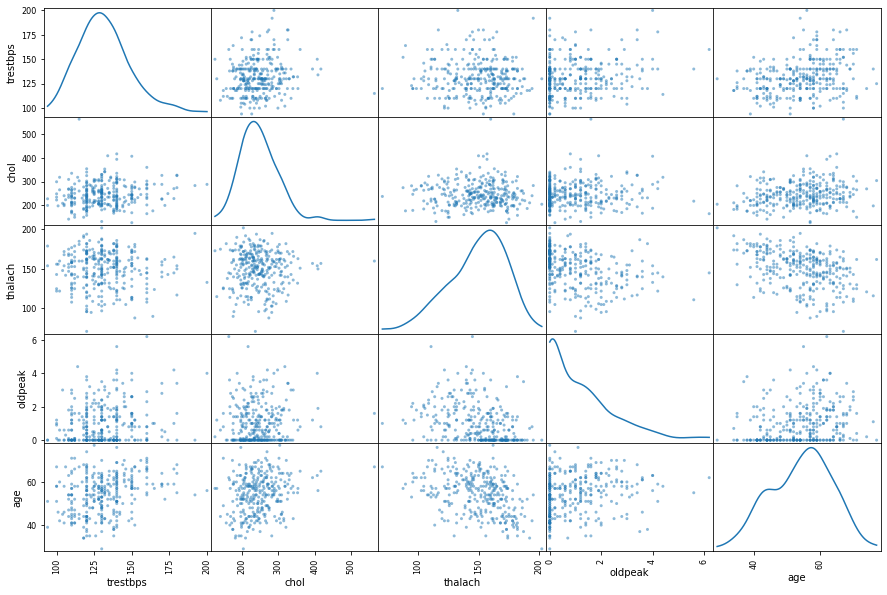

In [14]:
pd.plotting.scatter_matrix(data[['trestbps', 'chol', 'thalach', 'oldpeak', 'age']], figsize = (15, 10), diagonal = 'kde')
plt.show()

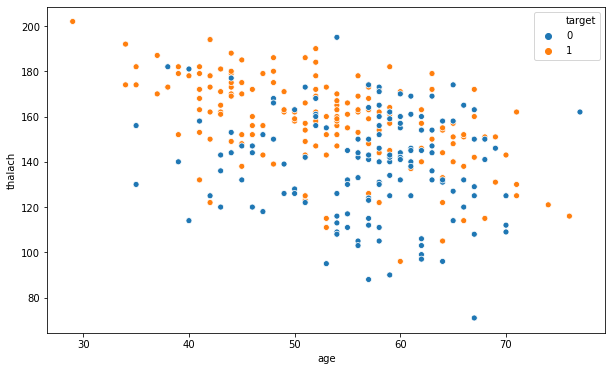

In [15]:
plt.figure(figsize = (10,6))
sns.scatterplot(data['age'], data['thalach'], hue=data['target'])
plt.show()

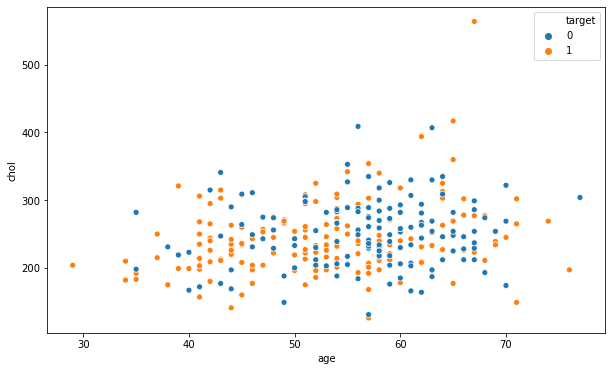

In [16]:
plt.figure(figsize = (10,6))
sns.scatterplot(data['age'], data['chol'], hue=data['target'])
plt.show()

<h1>Model</h1>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', 1), data['target'], test_size = .2,)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, criterion='gini')
rf.fit(X_train, y_train)
print('Accuracy = ', accuracy_score(rf.predict(X_test), y_test))

Accuracy =  0.7868852459016393


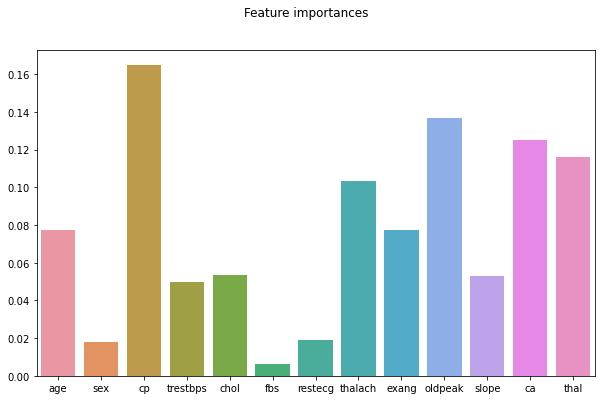

In [36]:
fig = plt.figure(figsize = (10, 6))
fig.suptitle("Feature importances")
sns.barplot(x= list(X_train.columns), y=rf.feature_importances_)
plt.show()

In [42]:
export_graphviz(rf.estimators_[0], feature_names = list(X_train.columns), out_file='tree.dot', filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')